In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import matplotlib.pyplot as plt

In [8]:
df_covid=pd.read_csv('D:\covid_python\covid_19_india.csv')

In [28]:
df_covid

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30-01-2020,6:00 PM,Kerala,1,0,0,0,1
1,2,31-01-2020,6:00 PM,Kerala,1,0,0,0,1
2,3,01-02-2020,6:00 PM,Kerala,2,0,0,0,2
3,4,02-02-2020,6:00 PM,Kerala,3,0,0,0,3
4,5,03-02-2020,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,11-08-2021,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,11-08-2021,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,11-08-2021,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,11-08-2021,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


In [69]:
basic_Statistics = (
    df_covid
    .groupby('State/UnionTerritory')[['Confirmed', 'Cured', 'Deaths']]
    .sum()
    .sort_values(by='Confirmed', ascending=False)
    .head(10)
)

basic_Statistics

,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Maharashtra,1127721063,1024765950,23868185
Karnataka,488855931,444665851,6089959
Kerala,458906023,420174235,1888177
Tamil Nadu,431928644,404095807,5916658
Andhra Pradesh,392432753,370426530,2939367
Uttar Pradesh,312625843,291479351,4143450
Delhi,287227765,273419887,4943294
West Bengal,263107876,247515102,3846989
Chhattisgarh,163776262,151609364,2063920


In [74]:
median=df_covid.groupby('State/UnionTerritory')[['Confirmed','Cured','Deaths']].median().sort_values(by='Confirmed',ascending=False).head(10)

median

,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Maharashtra,1784361.0,1654793.0,46653.0
Karnataka,874555.0,838150.0,11678.0
Andhra Pradesh,864258.5,844451.0,6959.0
Tamil Nadu,769995.0,745848.0,11605.0
Uttar Pradesh,523105.5,492179.5,7512.0
Delhi,513934.0,463755.5,8100.0
West Bengal,475716.5,442843.5,8296.0
Kerala,455388.0,368848.0,1573.0
Odisha,316942.0,309293.0,1711.0


In [73]:
most_cases_state_in_a_day=df_covid.groupby('State/UnionTerritory')['Confirmed'].max().head(10).sort_values(ascending=False).to_frame()

most_cases_state_in_a_day

,Confirmed
State/UnionTerritory,
Andhra Pradesh,1985182
Chhattisgarh,1003356
Bihar,725279
Assam,576149
Chandigarh,61992
Arunachal Pradesh,50605
Dadra and Nagar Haveli and Daman and Diu,10654
Dadra and Nagar Haveli,10377
Cases being reassigned to states,9265


In [58]:
recovery_rates=df_covid.groupby('State/UnionTerritory').apply(lambda x: x['Cured'].sum()/x['Confirmed'].sum()).head(10).to_frame()
recovery_rates

C:\Users\mvina\AppData\Local\Temp\ipykernel_84492\2986289230.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  recovery_rates=df_covid.groupby('State/UnionTerritory').apply(lambda x: x['Cured'].sum()/x['Confirmed'].sum()).head(10).to_frame()


,0
State/UnionTerritory,
Andaman and Nicobar Islands,0.953463
Andhra Pradesh,0.943924
Arunachal Pradesh,0.917965
Assam,0.928300
Bihar,0.946606
Cases being reassigned to states,0.000000
Chandigarh,0.931705
Chhattisgarh,0.925710
Dadra and Nagar Haveli,0.982145


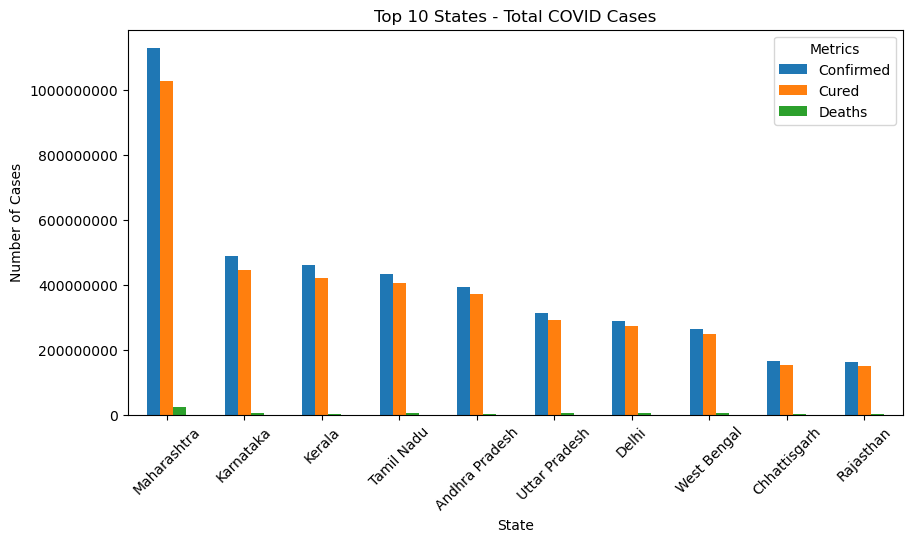

In [81]:


ax = basic_Statistics.plot(kind="bar", figsize=(10,5))
plt.title("Top 10 States - Total COVID Cases")
plt.xlabel("State")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.legend(title="Metrics")

# Turn off scientific notation
ax.ticklabel_format(style='plain', axis='y')

plt.show()
